<a href="https://colab.research.google.com/github/varun2001-vit/Jupyter/blob/main/twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
# Install Libraries
!pip install textblob
!pip install tweepy
!pip install pycountry
!pip install langdetect
!pip install twython 

In [26]:
# Import Libraries
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [27]:
# Authentication
consumerKey="D2LherBXHgfQ52CSEozDx6P8q"
consumerSecret="h3OTaNHqK7H8dlUAhtfbJpZMYjUmaKv0fEcE07xbnLGhiIdgQC"
accessTokenSecret="wzTAQioMR4jlTg2u9E3Y89AVwt1GsmGudODpxa9prLPI2"
accessToken="3316862388-g7Yv5t3yeoEH5FhXhpSPDXIOIB5iH4rwxfJhrf2"

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [28]:
def percentage(part,whole):
  return 100 * float(part)/float(whole)
keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze: "))
tweets = tweepy.Cursor(api.search, q=keyword).items(noOfTweet)
positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []
for tweet in tweets:
 
 #print(tweet.text)
 tweet_list.append(tweet.text)
 analysis = TextBlob(tweet.text)
 score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
 neg = score['neg']
 neu = score['neu']
 pos = score['pos']
 comp = score['compound']
 polarity += analysis.sentiment.polarity
 
 if neg > pos:
   negative_list.append(tweet.text)
   negative += 1
 elif pos > neg:
  positive_list.append(tweet.text)
  positive += 1
 
 elif pos == neg:
   neutral_list.append(tweet.text)
   neutral += 1
positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

Please enter keyword or hashtag to search: democracy
Please enter how many tweets to analyze: 2000


In [29]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number:", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  2000
positive number:  659
negative number: 1106
neutral number:  235


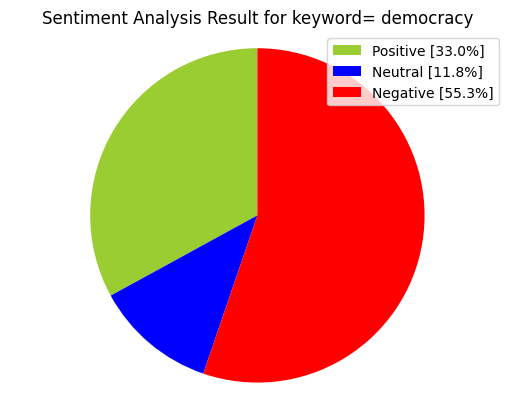

In [30]:
#Creating PieCart
labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword= "+keyword+"" )
plt.axis('equal')
plt.show()

In [31]:
tweet_list

,0
0,RT @RoryStewartUK: The key point is not that B...
1,RT @dgurdasani1: How stupid do you think we ar...
2,RT @BitcoinliveDB: @ForcesHidden True that 😁😉 ...
3,RT @Peter_Wehner: .@JonHaidt is among the wise...
4,RT @rommari: Why is everyone talking about Ukr...
...,...
1995,RT @KhaledBeydoun: If #India wants to be a Hin...
1996,RT @FPWellman: 'Norms and traditions' are goin...
1997,RT @zartajgulwazir: عوام اپنی آزادی کا خود تحف...
1998,RT @RoryStewartUK: The key point is not that B...


In [32]:
tweet_list.drop_duplicates(inplace = True)

In [33]:
#Cleaning Text (RT, Punctuation etc)
#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0–9]+)|([0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,RT @RoryStewartUK: The key point is not that B...,...
1,RT @dgurdasani1: How stupid do you think we ar...,? '...
2,RT @BitcoinliveDB: @ForcesHidden True that 😁😉 ...,😁😉 \n\n# ...
3,RT @Peter_Wehner: .@JonHaidt is among the wise...,. ...
4,RT @rommari: Why is everyone talking about Ukr...,? ...
5,RT @zartajgulwazir: عوام اپنی آزادی کا خود تحف...,عوام اپنی آزادی کا خود تحفظ کرتے ہیں۔\n\n ...
6,RT @campbellclaret: Liar. In Parliament. Resig...,. . . ...
10,"Under Putin, Russia has regressed into a total...",", ..."
11,the orders of the court. If the governments ar...,. ...
12,RT @AndyKroll: NEWS: I’ve accepted a new job a...,: ’ . \n\n ’ ...


In [34]:
#Calculating Negative, Positive, Neutral and Compound values
tw_list[["polarity", "subjectivity"]] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
      tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
      tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
        tw_list.loc[index, 'neg'] = neg
        tw_list.loc[index, 'neu'] = neu
        tw_list.loc[index, 'pos'] = pos
        tw_list.loc[index, 'compound'] = comp
tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,RT @RoryStewartUK: The key point is not that B...,...,0.0,0.0,neutral,0.0,0.0,0.0,0.0
1,RT @dgurdasani1: How stupid do you think we ar...,? '...,0.0,0.0,neutral,0.0,0.0,0.0,0.0
2,RT @BitcoinliveDB: @ForcesHidden True that 😁😉 ...,😁😉 \n\n# ...,0.0,0.0,neutral,0.0,1.0,0.0,0.0
3,RT @Peter_Wehner: .@JonHaidt is among the wise...,. ...,0.0,0.0,neutral,0.0,0.0,0.0,0.0
4,RT @rommari: Why is everyone talking about Ukr...,? ...,0.0,0.0,neutral,0.0,0.0,0.0,0.0
5,RT @zartajgulwazir: عوام اپنی آزادی کا خود تحف...,عوام اپنی آزادی کا خود تحفظ کرتے ہیں۔\n\n ...,0.0,0.0,neutral,0.0,1.0,0.0,0.0
6,RT @campbellclaret: Liar. In Parliament. Resig...,. . . ...,0.0,0.0,neutral,0.0,0.0,0.0,0.0
10,"Under Putin, Russia has regressed into a total...",", ...",0.0,0.0,neutral,0.0,1.0,0.0,0.0
11,the orders of the court. If the governments ar...,. ...,0.0,0.0,neutral,0.0,1.0,0.0,0.0
12,RT @AndyKroll: NEWS: I’ve accepted a new job a...,: ’ . \n\n ’ ...,0.0,0.0,neutral,0.0,0.0,0.0,0.0


In [35]:
#Creating new data frames for all sentiments (positive, negative and neutral)
tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [36]:
def count_values_in_column(data,feature):
 total=data.loc[:,feature].value_counts(dropna=False)
 percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
 return pd.concat([total,percentage],axis=1,keys=["Total","Percentage"])
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
neutral,831,100.0


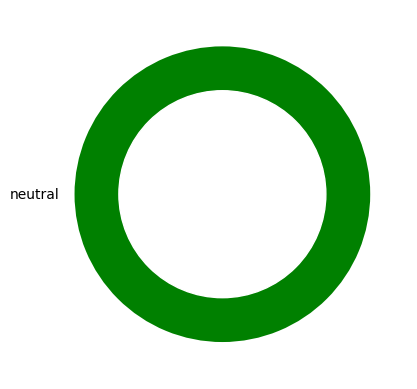

In [37]:
# create data for Pie Chart
pichart = count_values_in_column(tw_list,"sentiment")
names= pichart.index
size=pichart["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()